# Numerical Methods in Plasma Astrophysics {-}
## Maximilian Richter (3463789) {-}
### Exercise 1: N-Body Rubber Ducks {-}

In [121]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

np.random.seed(0)

def Calculate_Temperature(vel,N):
    real_vel = vel.copy()
    v_squared = np.sum(real_vel*real_vel, axis=1)
    v_mean = np.mean(v_squared)
    ene_kin_aver = 0.5*v_mean
    temperature = ene_kin_aver/3
    return ene_kin_aver,temperature


def compute_force(x):
    rm = 2
    n = x.shape[0]
    a = np.zeros(x.shape)
    energy_pot = np.zeros(x.shape)
    for i in range(n):
        for j in range(n):
            if i==j:
                continue
            r_vec = x[i] - x[j]
            for l in range(2): # Periodic interactions
                if (np.abs(r_vec[l])>10):
                    r_vec[l] = r_vec[l] - np.copysign(20.0,r_vec[l])
            r = np.sqrt(r_vec@r_vec)
            if (r<10):
                phi = (rm/r)**12 - 2*(rm/r)**6
                dphi = 12*rm**12/r**14 - 12*rm**6/r**8
                a[i] += dphi*r_vec
                a[j] -= dphi*r_vec
                energy_pot[i] += 0.5*phi
                energy_pot[j] += 0.5*phi
    return a, np.mean(energy_pot)


def solve_nbody(x, v, mu, dt, steps, method):
    n = x.shape[0]
    traj = np.zeros((steps, n, 2))
    temps = np.zeros(steps)
    energy_kin = np.zeros(steps)
    energy_pot = np.zeros(steps)
    
    for s in range(steps):
        for i in range(2):
            period = np.where(x[:,i] > 10)
            x[period,i]=x[period,i]-20
            period = np.where(x[:,i] < -10)
            x[period,i]=x[period,i]+20
        if method=="Leapfrog":
            x_half = x + v*dt/2
            a, energy_pot[s] = compute_force(x_half)
            energy_kin[s],temps[s] = Calculate_Temperature(v, n)
            v = v + (a - mu*v)*dt 
            x = x_half + dt/2*v 
        if method=="Euler":
            x = x + v*dt
            a, energy_pot[s] = compute_force(x)
            energy_kin[s],temps[s] = Calculate_Temperature(v, n)
            v = v + a*dt
        traj[s] = x
    return traj, energy_kin, energy_pot, temps

# a) Development of rubber duck population  {-}

The temperature is dependend on the standard deviation of the velocity distribution, so starting with different standard deviation is equivalent to starting with different temperatures

In [91]:
n = 5**2
mu = 0.0
dt = 0.01
steps = 1000
boxsize = 10

lin = np.linspace(-9,9,int(np.sqrt(n)))
X,Y = np.meshgrid(lin,lin)

x = np.vstack([X.ravel(), Y.ravel()]).T  

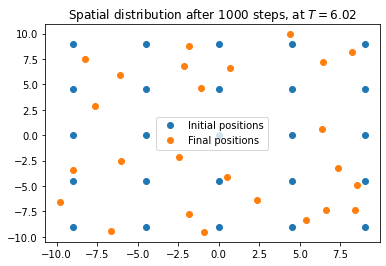

In [93]:
v = np.random.normal(0,5.0,(n,2))
traj, energy_kin, energy_pot, temps = solve_nbody(x, v, mu, dt, steps, "Leapfrog")
plt.plot(x[:,0], x[:,1], "o", label="Initial positions")
plt.plot(traj[-1,:,0], traj[-1,:,1],"o", label="Final positions")
plt.title("Spatial distribution after {} steps, at $T=${:.2f}".format(steps, temps[-1]))
plt.legend()

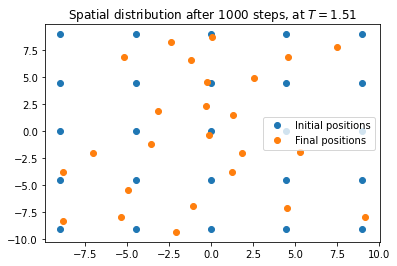

In [94]:
v = np.random.normal(0,2.0,(n,2))
traj, energy_kin, energy_pot, temps = solve_nbody(x, v, mu, dt, steps, "Leapfrog")
plt.plot(x[:,0], x[:,1], "o", label="Initial positions")
plt.plot(traj[-1,:,0], traj[-1,:,1],"o", label="Final positions")
plt.title("Spatial distribution after {} steps, at $T=${:.2f}".format(steps, temps[-1]))
plt.legend()

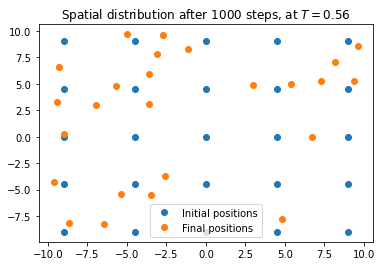

In [95]:
v = np.random.normal(0,1.0,(n,2))
traj, energy_kin, energy_pot, temps = solve_nbody(x, v, mu, dt, steps, "Leapfrog")
plt.plot(x[:,0], x[:,1], "o", label="Initial positions")
plt.plot(traj[-1,:,0], traj[-1,:,1],"o", label="Final positions")
plt.title("Spatial distribution after {} steps, at $T=${:.2f}".format(steps, temps[-1]))
plt.legend()

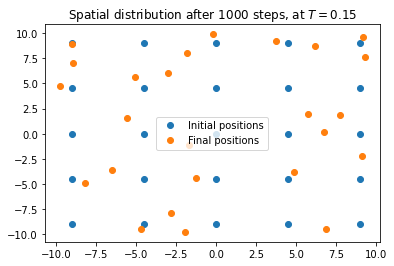

In [96]:
v = np.random.normal(0,0.1,(n,2))
traj, energy_kin, energy_pot, temps = solve_nbody(x, v, mu, dt, steps, "Leapfrog")
plt.plot(x[:,0], x[:,1], "o", label="Initial positions")
plt.plot(traj[-1,:,0], traj[-1,:,1],"o", label="Final positions")
plt.title("Spatial distribution after {} steps, at $T=${:.2f}".format(steps, temps[-1]))
plt.legend()

For high temperatures, no pattern in the arrangement of the particles can be observed. However, with decreasing temperature we can see a progressive formation of clusters of particles which "stick" together. At lowest temperature the particles are making chains and crystal-like structures.

# b) Total energy developement  {-}

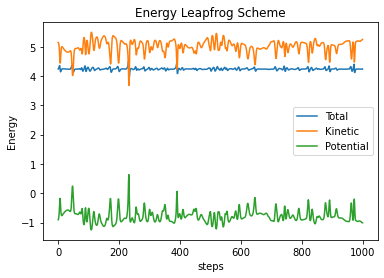

In [86]:
traj, energy_kin, energy_pot, temps = solve_nbody(x, v, mu, dt, steps, "Leapfrog")
plt.plot((energy_kin+energy_pot), label="Total")
plt.plot(energy_kin, label="Kinetic")
plt.plot(energy_pot, label="Potential")
plt.title("Energy Leapfrog Scheme")
plt.xlabel("steps")
plt.ylabel("Energy")
plt.legend()
plt.show()


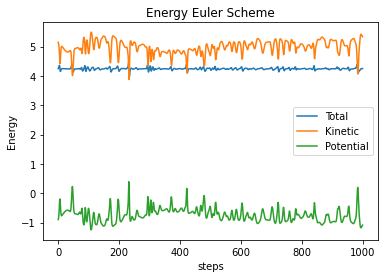

In [87]:
traj, energy_kin, energy_pot, temps = solve_nbody(x, v, mu, dt, steps, "Euler")
plt.plot((energy_kin+energy_pot), label="Total")
plt.plot(energy_kin, label="Kinetic")
plt.plot(energy_pot, label="Potential")
plt.title("Energy Euler Scheme")
plt.xlabel("steps")
plt.ylabel("Energy")
plt.legend()
plt.show()


The total energy, the sum of kinetic and potential energy, stays more or less constant over time as expected for a energy conserving system. The Leapfrog scheme seems to perform slightly better than the Euler schmeme, which tends to have bigger oscilattions in the energies. 

# c) Cooling  {-}

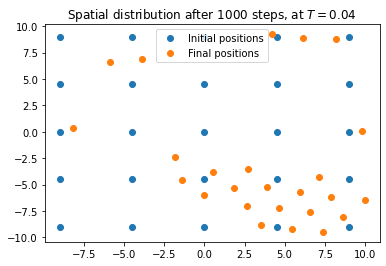

In [100]:
mu = 0.5
v = np.random.normal(0,2.0,(n,2))

traj, energy_kin, energy_pot, temps = solve_nbody(x, v, mu, dt, steps, "Leapfrog")

plt.plot(x[:,0], x[:,1], "o", label="Initial positions")
plt.plot(traj[-1,:,0], traj[-1,:,1],"o", label="Final positions")
plt.title("Spatial distribution after {} steps, at $T=${:.2f}".format(steps, temps[-1]))
plt.legend()
plt.show()

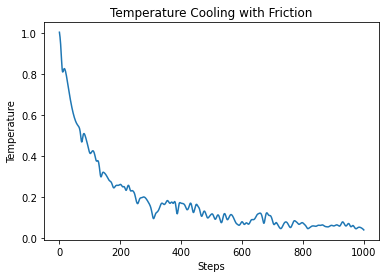

In [101]:

plt.title("Temperature Cooling with Friction")
plt.plot(temps)
plt.xlabel("Steps")
plt.ylabel("Temperature")
plt.show()

As the temperature falls, the ducks start to make crystal like patters (hexagonal in our case, because of optimal distribution in a plane). This is because the lennard-jones potential has a minimum, the preferred distance $r_m$. 

# Additional: Animation of the crystal formation when cooling down the system  {-}

MovieWriter imagemagick unavailable; using Pillow instead.


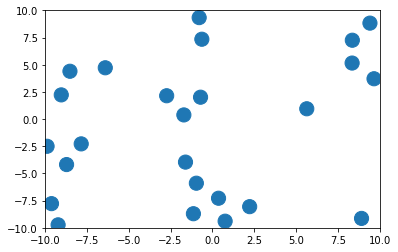

In [17]:
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))

n = 10
v = np.random.normal(0,1,(n,2))
x = np.random.uniform(0,10,(n,2))

line = ax.scatter(traj[0,:,0], traj[0,:,1], s=np.ones(traj[0,:,0].shape)*200)

dt = 0.01
def init():
    line.set_offsets(np.c_[x[:,0], x[:,1]])
    return line,
def animate(i):
    x = traj[i]
    line.set_offsets(np.c_[x[:,0], x[:,1]])
    return line,

anim = FuncAnimation(fig, animate, frames=1000, interval=20)
anim.save('lennard_jones_cooling.gif',writer='imagemagick') 

# d) Plot of Runtime for Euler and Leapfrog

In [109]:
def eval_time(n):
    #n = 5**2
    mu = 0.0
    dt = 0.01
    steps = 10
    boxsize = 10

    lin = np.linspace(-9,9,int(np.sqrt(n)))
    X,Y = np.meshgrid(lin,lin)

    x = np.vstack([X.ravel(), Y.ravel()]).T  
    v = np.random.normal(0,0.1,(n,2))

    start_time = time.time()
    traj, energy_kin, energy_pot, temps = solve_nbody(x, v, mu, dt, steps, "Leapfrog")
    end_time = time.time() 
    time_lf = end_time - start_time

    start_time = time.time()
    traj, energy_kin, energy_pot, temps = solve_nbody(x, v, mu, dt, steps, "Euler")
    end_time = time.time()
    time_euler = end_time - start_time

    return np.array([time_lf, time_euler])

In [113]:
ns = [i**2 for i in range(1,10)]
times = []
repeat = 10
print(repeat)
for i in range(repeat):
    print("Current round:", i)
    times.append(np.array([eval_time(n) for n in ns]))

times = np.array(times)
times_lf = times[:,:,0]
times_euler = times[:,:,1]

10
Current round: 0
Current round: 1
Current round: 2
Current round: 3
Current round: 4
Current round: 5
Current round: 6
Current round: 7
Current round: 8
Current round: 9


Text(0.5, 1.0, 'Execution time for nbody Simulation')

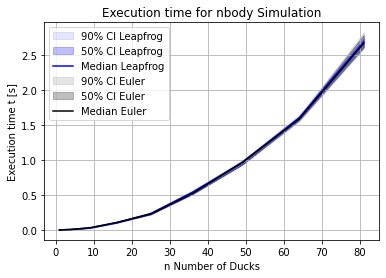

In [122]:
plt.fill_between(ns, np.percentile(times_lf, axis=0, q=[10]).ravel()[:], 
                     np.percentile(times_lf, axis=0, q=[90]).ravel()[:], 
                     alpha = 0.1, color='b', label='90% CI Leapfrog');

plt.fill_between(ns, np.percentile(times_lf, axis=0, q=[25]).ravel()[:],
                     np.percentile(times_lf, axis=0, q=[75]).ravel()[:], 
                     alpha = 0.25, color='b', label='50% CI Leapfrog');

plt.plot(ns, np.mean(times_lf, axis=0)[:], color="blue", label='Median Leapfrog')

plt.fill_between(ns, np.percentile(times_euler, axis=0, q=[10]).ravel()[:], 
                     np.percentile(times_euler, axis=0, q=[90]).ravel()[:], 
                     alpha = 0.1, color='black', label='90% CI Euler');

plt.fill_between(ns, np.percentile(times_euler, axis=0, q=[25]).ravel()[:],
                     np.percentile(times_euler, axis=0, q=[75]).ravel()[:], 
                     alpha = 0.25, color='black', label='50% CI Euler');

plt.plot(ns, np.median(times_euler, axis=0)[:], color="black", label='Median Euler')

plt.legend()
plt.grid()
plt.xlabel("n Number of Ducks")
plt.ylabel("Execution time t [s]")
plt.title("Execution time for nbody Simulation")

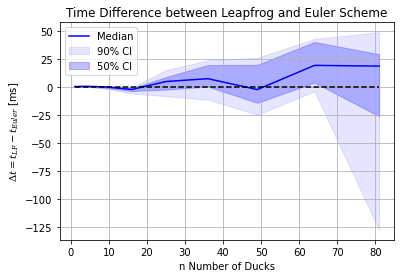

In [123]:
delta_time = (times_lf-times_euler)*1e3
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.plot(ns, np.median(delta_time, axis=0), color="blue", label="Median")

plt.fill_between(ns, np.percentile(delta_time, axis=0, q=[10]).ravel()[:], 
                     np.percentile(delta_time, axis=0, q=[90]).ravel()[:], 
                     alpha = 0.1, color='b', label='90% CI');

plt.fill_between(ns, np.percentile(delta_time, axis=0, q=[25]).ravel()[:],
                     np.percentile(delta_time, axis=0, q=[75]).ravel()[:], 
                     alpha = 0.25, color='b', label='50% CI');

plt.hlines(0, ns[0], ns[-1], linestyles="--", color="black")

plt.xlabel("n Number of Ducks")
plt.ylabel("$\Delta t=t_{LF}-t_{Euler}$ [ms]")
plt.title("Time Difference between Leapfrog and Euler Scheme")
plt.legend()
plt.grid()

Leapfrog is a little big slower than the Euler scheme. The difference is however negligible compared to the overall runtimes of the algorithms. 